In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
langs=['English', 'Croatian', 'Hindi', 'Hungarian', 'Turkish', 'French']

tag_dicts={}
for lang in langs:
    
    data_path=lang+'-20-char-context/'
    
    with open(data_path+'train-pos-targets') as pt:
        pos_tags={}
        for line in pt:
            if line not in pos_tags:
                pos_tags[line]=1
            else:
                pos_tags[line]+=1
                
    
    tag_dicts[lang]=pos_tags

In [5]:
tag_dicts

{'Croatian': {'<pos> A D J </pos>\n': 1272,
  '<pos> A D P </pos>\n': 1120,
  '<pos> A D V </pos>\n': 430,
  '<pos> A U X </pos>\n': 822,
  '<pos> C C O N J </pos>\n': 396,
  '<pos> D E T </pos>\n': 419,
  '<pos> N O U N </pos>\n': 2931,
  '<pos> N U M </pos>\n': 74,
  '<pos> P A R T </pos>\n': 87,
  '<pos> P R O N </pos>\n': 268,
  '<pos> P R O P N </pos>\n': 843,
  '<pos> S C O N J </pos>\n': 275,
  '<pos> V E R B </pos>\n': 1027,
  '<pos> X </pos>\n': 36},
 'English': {'<pos> A D J </pos>\n': 785,
  '<pos> A D P </pos>\n': 1193,
  '<pos> A D V </pos>\n': 532,
  '<pos> A U X </pos>\n': 628,
  '<pos> C C O N J </pos>\n': 341,
  '<pos> D E T </pos>\n': 1021,
  '<pos> I N T J </pos>\n': 4,
  '<pos> N O U N </pos>\n': 1760,
  '<pos> N U M </pos>\n': 61,
  '<pos> P A R T </pos>\n': 292,
  '<pos> P R O N </pos>\n': 646,
  '<pos> P R O P N </pos>\n': 1320,
  '<pos> S C O N J </pos>\n': 237,
  '<pos> S Y M </pos>\n': 1,
  '<pos> V E R B </pos>\n': 1174,
  '<pos> X </pos>\n': 5},
 'French': {

In [16]:
eng_tags = tag_dicts['English'].keys()
fr_tags = tag_dicts['French'].keys()
hr_tags = tag_dicts['Hungarian'].keys()
cr_tags = tag_dicts['Croatian'].keys()
hi_tags = tag_dicts['Hindi'].keys()
tr_tags = tag_dicts['Turkish'].keys()

pos_tags = set(eng_tags).union(hi_tags).union(tr_tags).union(cr_tags).union(fr_tags).union(hi_tags)

In [17]:
pos_tags

{'<pos> A D J </pos>\n',
 '<pos> A D P </pos>\n',
 '<pos> A D V </pos>\n',
 '<pos> A U X </pos>\n',
 '<pos> C C O N J </pos>\n',
 '<pos> D E T </pos>\n',
 '<pos> I N T J </pos>\n',
 '<pos> N O U N </pos>\n',
 '<pos> N U M </pos>\n',
 '<pos> P A R T </pos>\n',
 '<pos> P R O N </pos>\n',
 '<pos> P R O P N </pos>\n',
 '<pos> S C O N J </pos>\n',
 '<pos> S Y M </pos>\n',
 '<pos> V E R B </pos>\n',
 '<pos> X </pos>\n'}

In [22]:
for lang in langs:
    suml=0
    for key in tag_dicts[lang].keys():
        suml+=tag_dicts[lang][key]
    print(suml)

10000
10000
10000
10000
10000
10000


In [28]:

dict_tag_lists={}
count=0
for tag in ['<pos> A D J </pos>\n',
 '<pos> A D P </pos>\n',
 '<pos> A D V </pos>\n',
 '<pos> A U X </pos>\n',
 '<pos> C C O N J </pos>\n',
 '<pos> D E T </pos>\n',
 '<pos> N O U N </pos>\n', 
 '<pos> P R O N </pos>\n',
 '<pos> P R O P N </pos>\n',
 '<pos> V E R B </pos>\n']:
    ls=[]
    for lang in langs:
        ls.append(tag_dicts[lang][tag])
    dict_tag_lists[count]=ls
    count+=1

In [38]:
data=[]
for key in dict_tag_lists.keys():
    data.append(dict_tag_lists[key])

In [81]:
dict_tag_2={}
count=0
for lang in langs:
    l = []
    for tag in ['<pos> A D J </pos>\n',
     '<pos> A D P </pos>\n',
     '<pos> A D V </pos>\n',
     '<pos> A U X </pos>\n',
     '<pos> C C O N J </pos>\n',
     '<pos> D E T </pos>\n',
     '<pos> N O U N </pos>\n', 
     '<pos> P R O N </pos>\n',
     '<pos> P R O P N </pos>\n',
     '<pos> V E R B </pos>\n']:
        l.append(tag_dicts[lang][tag])
    dict_tag_2[count]=l
    count+=1

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


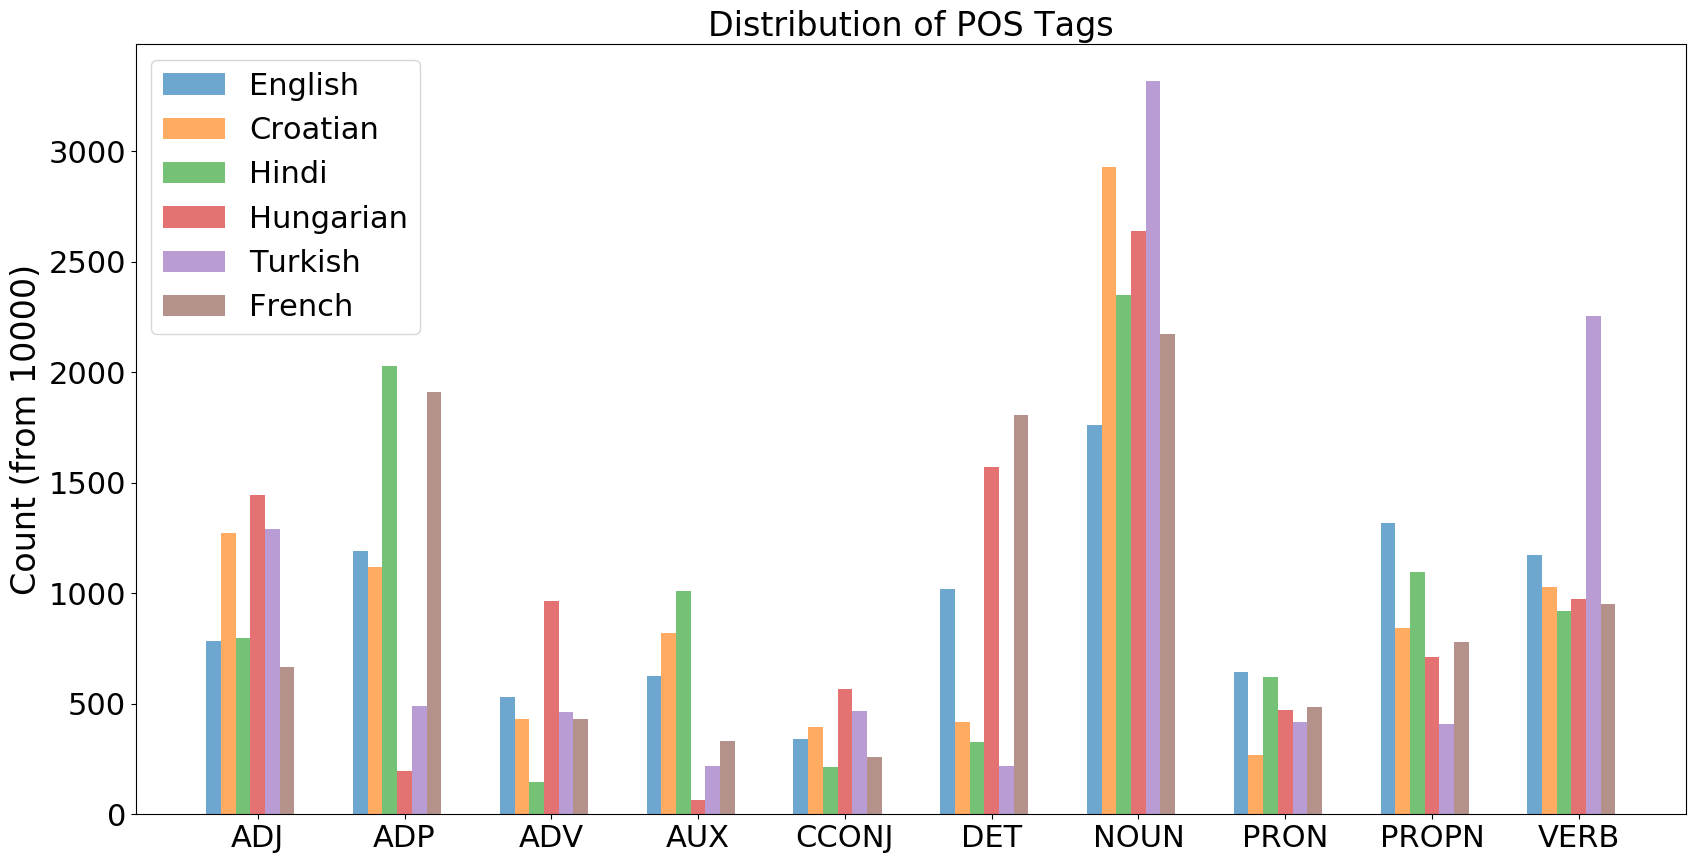

In [260]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
colors={}
matplotlib.rc('font', **font)
N = 5

ind = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # the x locations for the groups
width = 0.5       # the width of the bars

plt.figure(figsize=(20,10))
plt.subplot(111)
for i in np.arange(6):
    plt.bar(ind, dict_tag_2[i], 0.1, label=langs[i], alpha=0.65)
    ind=[i+0.1 for i in ind]
# add some
plt.ylabel('Count (from 10000)', fontsize=24)
plt.title('Distribution of POS Tags', fontsize=24)
tk=[i-0.3 for i in ind]
plt.xticks(tk, ('ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'NOUN', 'PRON', 'PROPN', 'VERB' ))

plt.legend()
plt.savefig('pos.png')
plt.show()

In [154]:
langs=['English', 'Croatian', 'Hindi', 'Hungarian', 'Turkish', 'French']

copies=[]
for lang in langs:
    copied=0
    data_path=lang+'-20-char-context/'
    
    with open(data_path+'train-targets') as t:
        train_targets=[]
        for line in t:
            lemma = "".join(line.strip().split()[1:-1]).lower()
            train_targets.append(lemma)
            
    with open(data_path+'train-sources') as s:
        train_inputs=[]
        for line in s:
            inflection = "".join(line.split("<lc>")[1].split("<rc>")[0].strip().split()).lower()
            train_inputs.append(inflection)
                
    for i, l in zip(train_inputs,train_targets):
        if i==l:
            copied+=1
    copies.append(copied)

In [155]:
copies = [c*100/10000 for c in copies]
copies
['English', 'Croatian', 'Hindi', 'Hungarian', 'Turkish', 'French']

[81.18, 42.56, 70.8, 65.68, 46.46, 65.93]

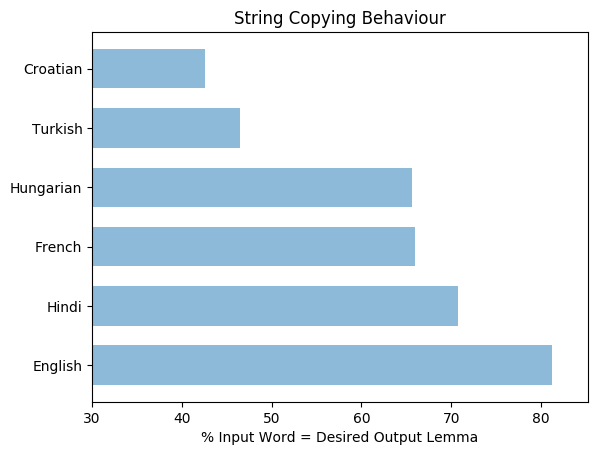

In [239]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
copies = list(reversed([42.56,46.46, 65.68, 65.93,70.8, 81.18]))
objects = ('English', 'Hindi', 'French', 'Hungarian','Turkish', 'Croatian')
y_pos = [0, 0.3, 0.6, 0.9, 1.2, 1.5]
performance = [10,8,6,4,2,1]
 
plt.barh(y_pos, copies, align='center', alpha=0.5, height=0.2)
plt.yticks(y_pos, objects)
plt.xlim(xmin=30)
plt.xlabel('% Input Word = Desired Output Lemma')
plt.title('String Copying Behaviour')
plt.savefig('copy.png')
plt.show()

In [177]:
langs=['English', 'Croatian', 'Hindi', 'Hungarian', 'Turkish', 'French']

copies=[]
unseens=[]
for lang in langs:
    copied=0
    unseen=0
    data_path=lang+'-20-char-context/'
    
    with open(data_path+'train-targets') as t:
        train_targets=[]
        for line in t:
            lemma = "".join(line.strip().split()[1:-1]).lower()
            train_targets.append(lemma)
            
    with open(data_path+'train-sources') as s:
        train_inputs=[]
        for line in s:
            inflection = "".join(line.split("<lc>")[1].split("<rc>")[0].strip().split()).lower()
            train_inputs.append(inflection)
            
    with open(data_path+'dev-sources') as s2:
        dev_inputs=[]
        for line in s2:
            inflection = "".join(line.split("<lc>")[1].split("<rc>")[0].strip().split()).lower()
            dev_inputs.append(inflection)
                
    for i, l in zip(train_inputs,train_targets):
        if i==l:
            copied+=1
    for inp in dev_inputs:
        if inp not in train_inputs:
            unseen+=1
    copies.append(copied)
    unseens.append(unseen)

In [178]:
unseens=[i*100/8000 for i in unseens]
unseens

[26.65, 39.225, 31.1, 43.375, 42.5, 28.375]

In [179]:
langs

['English', 'Croatian', 'Hindi', 'Hungarian', 'Turkish', 'French']

In [201]:
langs=['English', 'Croatian', 'Hindi', 'Hungarian', 'Turkish', 'French']

copies=[]
unseens=[]

for lang in langs:
    copied=0
    unseen=0
    input_to_lemma_dict={}
    data_path=lang+'-20-char-context/'
    
    with open(data_path+'train-targets') as t:
        train_targets=[]
        for line in t:
            lemma = "".join(line.strip().split()[1:-1]).lower()
            train_targets.append(lemma)
            
    with open(data_path+'train-sources') as s:
        train_inputs=[]
        for line in s:
            inflection = "".join(line.split("<lc>")[1].split("<rc>")[0].strip().split()).lower()
            train_inputs.append(inflection)
            
    with open(data_path+'dev-sources') as s2:
        dev_inputs=[]
        for line in s2:
            inflection = "".join(line.split("<lc>")[1].split("<rc>")[0].strip().split()).lower()
            dev_inputs.append(inflection)
                
    for i, l in zip(train_inputs,train_targets):
        if i not in input_to_lemma_dict.keys():
            input_to_lemma_dict[i]=[l]
        else:
            if input_to_lemma_dict[i]:
                if l not in input_to_lemma_dict[i]:
                    input_to_lemma_dict[i].append(l)
    count_amb=0.0
    for i in dev_inputs:
        if i in input_to_lemma_dict.keys():
            if input_to_lemma_dict[i]:
                if len(input_to_lemma_dict[i])>1:
                    count_amb+=1
                    #print(i, input_to_lemma_dict[i])
                    if lang=='French':
                        print(i, input_to_lemma_dict[i])
    print(lang, 'types:', len(input_to_lemma_dict.keys()))
    copies.append(copied)
    unseens.append(unseen)
    print(lang, 'ambs:', count_amb*100/8000)

English types: 2624
English ambs: 1.225
Croatian types: 3919
Croatian ambs: 5.15
Hindi types: 2593
Hindi ambs: 11.8
Hungarian types: 4704
Hungarian ambs: 15.375
Turkish types: 5478
Turkish ambs: 1.5125
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la'

de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
de ['de', 'un']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
leur ['son', 'lui']
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le', "l'"]
l' ['le'

In [207]:
langs=['English', 'Croatian', 'Hindi', 'Hungarian', 'Turkish', 'French']

copies=[]
unseens=[]

for lang in langs:
    copied=0
    unseen=0
    input_to_lemma_dict={}
    data_path=lang+'-20-char-context/'
    
    with open(data_path+'train-targets') as t:
        train_targets=[]
        for line in t:
            lemma = "".join(line.strip().split()[1:-1]).lower()
            train_targets.append(lemma)
            
    with open(data_path+'train-sources') as s:
        train_inputs=[]
        for line in s:
            inflection = "".join(line.split("<lc>")[1].split("<rc>")[0].strip().split()).lower()
            train_inputs.append(inflection)
            
    with open(data_path+'dev-sources') as s2:
        dev_inputs=[]
        for line in s2:
            inflection = "".join(line.split("<lc>")[1].split("<rc>")[0].strip().split()).lower()
            dev_inputs.append(inflection)
            
    with open(data_path+'dev-targets') as s3:
        dev_targets=[]
        for line in s3:
            inflection = "".join(line.strip().split()[1:-1]).lower()
            dev_targets.append(inflection)
    count_l=0
    count_le=0
    for i, l in zip(train_inputs,train_targets):
        if i not in input_to_lemma_dict.keys():
            input_to_lemma_dict[i]=[l]
        else:
            if input_to_lemma_dict[i]:
                if l not in input_to_lemma_dict[i]:
                    input_to_lemma_dict[i].append(l)
        if i=="l'":
            count_l+=1
            if l=="l'":
                count_le+=1
    count_amb=0.0

    for i in dev_inputs:
        if i in input_to_lemma_dict.keys():
            if input_to_lemma_dict[i]:
                if len(input_to_lemma_dict[i])>1:
                    count_amb+=1
                    #print(i, input_to_lemma_dict[i])
                    if lang=='French':
                        print(i, input_to_lemma_dict[i])
    
    
    print(lang, 'types:', len(input_to_lemma_dict.keys()))
    copies.append(copied)
    unseens.append(unseen)
    print(lang, 'ambs:', count_amb*100/8000)
    
    if lang=='French':
        print('count le', count_l, count_le)

English types: 2624
English ambs: 1.225
Croatian types: 3919
Croatian ambs: 5.15
Hindi types: 2593
Hindi ambs: 11.8
Hungarian types: 4704
Hungarian ambs: 15.375
Turkish types: 5478
Turkish ambs: 1.5125
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la']
la ['le', 'la'

est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']
est ['être', 'est']


In [216]:
langs=['English', 'Croatian', 'Hindi', 'Hungarian', 'Turkish', 'French']

copies=[]
unseens=[]

for lang in langs:
    copied=0
    unseen=0
    input_to_lemma_dict={}
    data_path=lang+'-20-char-context/'
    
    with open(data_path+'train-targets') as t:
        train_targets=[]
        for line in t:
            lemma = "".join(line.strip().split()[1:-1]).lower()
            train_targets.append(lemma)
            
    with open(data_path+'train-sources') as s:
        train_inputs=[]
        for line in s:
            inflection = "".join(line.split("<lc>")[1].split("<rc>")[0].strip().split()).lower()
            train_inputs.append(inflection)
            
    with open(data_path+'dev-sources') as s2:
        dev_inputs=[]
        for line in s2:
            inflection = "".join(line.split("<lc>")[1].split("<rc>")[0].strip().split()).lower()
            dev_inputs.append(inflection)
            
    with open(data_path+'dev-targets') as s3:
        dev_targets=[]
        for line in s3:
            inflection = "".join(line.strip().split()[1:-1]).lower()
            dev_targets.append(inflection)
    count_l=0
    count_le=0
    for i, l in zip(train_inputs,train_targets):
        if i not in input_to_lemma_dict.keys():
            input_to_lemma_dict[i]=[l]
        else:
            if input_to_lemma_dict[i]:
                if l not in input_to_lemma_dict[i]:
                    input_to_lemma_dict[i].append(l)
        if i=="de":
            count_l+=1
            if l=="un":
                count_le+=1
                
    count_amb=0.0

    for i in dev_inputs:
        if i in input_to_lemma_dict.keys():
            if input_to_lemma_dict[i]:
                if len(input_to_lemma_dict[i])>1:
                    count_amb+=1
                    #print(i, input_to_lemma_dict[i])
                    #if lang=='French':
                     #   print(i, input_to_lemma_dict[i])
    
    
    print(lang, 'types:', len(input_to_lemma_dict.keys()))
    copies.append(copied)
    unseens.append(unseen)
    print(lang, 'ambs:', count_amb*100/8000)
    print(count_amb)
    if lang=='French':
        print('count le', count_l, count_le)

English types: 2624
English ambs: 1.225
98.0
Croatian types: 3919
Croatian ambs: 5.15
412.0
Hindi types: 2593
Hindi ambs: 11.8
944.0
Hungarian types: 4704
Hungarian ambs: 15.375
1230.0
Turkish types: 5478
Turkish ambs: 1.5125
121.0
French types: 3477
French ambs: 19.9125
1593.0
count le 847 10


une une un (une 2/107)
l' le l' (7/232)
nouvelle
première
vous
nous
ou
la le (la 3/345)
leur
de un (10/847)

1593.0


In [217]:
107+232+345+847

1531

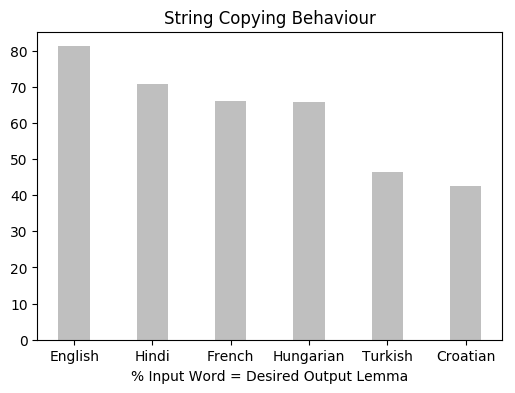

In [263]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
copies = list(reversed([42.56,46.46, 65.68, 65.93,70.8, 81.18]))
objects = ('English', 'Hindi', 'French', 'Hungarian','Turkish', 'Croatian')
y_pos = [0, 1, 2, 3, 4, 5]
performance = [10,8,6,4,2,1]
plt.figure(figsize=(6,4))
plt.bar( y_pos, copies, align='center', alpha=0.5, width=0.4, color='grey')
plt.xticks(y_pos, objects)
plt.xlabel('% Input Word = Desired Output Lemma')
plt.title('String Copying Behaviour')
plt.savefig('copy2.png')
plt.show()